# Estimate MP parameters for Vivek data

In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import img_as_float
from scipy.io import savemat

from otimage import io 
from otimage.utils import plot_maxproj
from otimage.imagerep import mp_gaussian, reconstruct_image

### Load single frame to test on

961


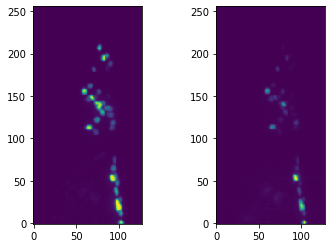

In [14]:
in_fpath = '/home/mn2822/Desktop/WormTraces/data/Vivek/1011_tail_03/data.mat'

with io.VivekReader(in_fpath) as reader:
    img_1 = reader.get_frame(0)
    img_2 = reader.get_frame(1)
    print(reader.num_frames)
    
plt.subplot(121)
plot_maxproj(img_1);

plt.subplot(122)
plot_maxproj(img_2);

### Set parameters

In [73]:
# Covariance values for each dimension
cov = np.diag([3.0, 3.0, 1.0])

# Number of MP iterations to run
n_iter = 50

### Run MP on image and plot results

In [74]:
pts, wts, _ = mp_gaussian(img, cov, n_iter)

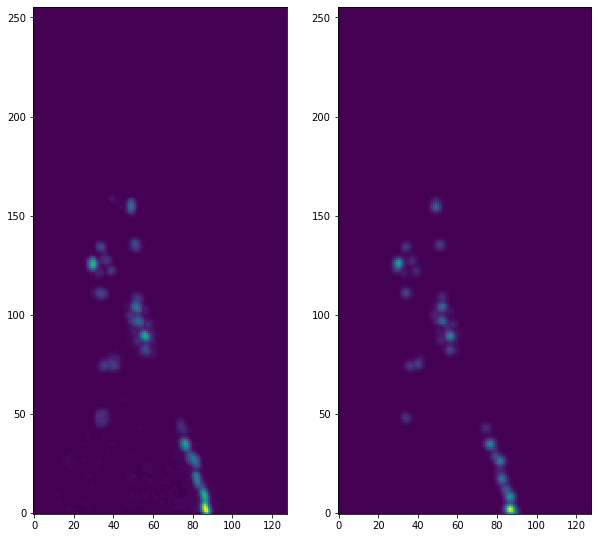

In [79]:
img_recon = reconstruct_image(pts, [cov], wts, img.shape)

plt.figure(figsize=(10, 10))
    
plt.subplot(121)
plot_maxproj(img)
    
plt.subplot(122)
plot_maxproj(img_recon);